## DS в разработке инновационных решений 
<b>Кейс "Врата Вечности"</b>

<b>План работы:
1. Загрузка и первичная обработка данных: ознакомится с загруженным файлом, исследовать его структуру, типы данных, наличие пропусков.
2. Анализ мультиколлинеарности и взаимосвязей признаков
3. Отбор признаков
4. Построение моделей регрессии
5. Оценка качества моделей
6. Финальная модель и интерпретация результатов</b>

In [3]:
#Импортируем нужные библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [4]:
data = pd.read_csv('data.csv') #Считываем файл

In [5]:
data.head()

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Температура выдоха Истока,Приток давления Выдоха Истока,Давление вдоха Истока,Давление выдоха Истока,Древний Ветер,Печать Чародея,Эмульсия Истока,Дыхание Истока,Гармония Бессмертия
0,1.138,1.54332,289.964,141.318158,6677.380,7.584,7.584,464.006,736,Исток не вернул выдох,1.096,1.394603,5.947,Древний Ветер развеялся,7.137,0.082,0.95,0.975
1,2.088,3.08664,6960.180,144.111767,6828.469,28.204,28.204,635.401,736,581.658,1.331,1.394603,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,4.62996,8379.229,145.220853,7111.811,60.358,60.358,606.002,736,Исток не вернул выдох,1.389,1.394603,7.574,Древний Ветер развеялся,13.086,0.259,0.95,0.975
3,4.161,6.17328,14724.395,162.050156,7792.630,113.774,113.774,661.471,736,Исток не вернул выдох,1.658,1.394603,9.007,Древний Ветер развеялся,18.109,0.358,0.95,0.975
4,5.140,7.71660,21636.432,201.513586,8494.777,175.306,175.306,731.494,736,645.642,2.078,1.394603,11.197,1.026,26.373,0.522,0.95,0.975


In [6]:
#Перепишем названия столбцов без пробелов, чтобы избежать возможных проблем
df = data.copy()
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [7]:
df.head() #Посмотрим на данные 

,вектор_мощи,скорость_перехода_через_портал,приток_силы_потока,ритм_магического_ядра,поток_энергий,сила_левого_потока,сила_правого_потока,пламя_стихий,температура_вдоха_истока,температура_выдоха_истока,приток_давления_выдоха_истока,давление_вдоха_истока,давление_выдоха_истока,древний_ветер,печать_чародея,эмульсия_истока,дыхание_истока,гармония_бессмертия
0,1.138,1.54332,289.964,141.318158,6677.380,7.584,7.584,464.006,736,Исток не вернул выдох,1.096,1.394603,5.947,Древний Ветер развеялся,7.137,0.082,0.95,0.975
1,2.088,3.08664,6960.180,144.111767,6828.469,28.204,28.204,635.401,736,581.658,1.331,1.394603,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,4.62996,8379.229,145.220853,7111.811,60.358,60.358,606.002,736,Исток не вернул выдох,1.389,1.394603,7.574,Древний Ветер развеялся,13.086,0.259,0.95,0.975
3,4.161,6.17328,14724.395,162.050156,7792.630,113.774,113.774,661.471,736,Исток не вернул выдох,1.658,1.394603,9.007,Древний Ветер развеялся,18.109,0.358,0.95,0.975
4,5.140,7.71660,21636.432,201.513586,8494.777,175.306,175.306,731.494,736,645.642,2.078,1.394603,11.197,1.026,26.373,0.522,0.95,0.975


In [8]:
df.info() #Посмотрим на типы данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   вектор_мощи                     11934 non-null  float64
 1   скорость_перехода_через_портал  11934 non-null  float64
 2   приток_силы_потока              11934 non-null  float64
 3   ритм_магического_ядра           11934 non-null  float64
 4   поток_энергий                   11934 non-null  float64
 5   сила_левого_потока              11934 non-null  float64
 6   сила_правого_потока             11934 non-null  float64
 7   пламя_стихий                    11934 non-null  float64
 8   температура_вдоха_истока        11934 non-null  int64  
 9   температура_выдоха_истока       11934 non-null  object 
 10  приток_давления_выдоха_истока   11934 non-null  float64
 11  давление_вдоха_истока           11934 non-null  float64
 12  давление_выдоха_истока          

In [9]:
df.describe() #Посмотрим основные статистики 

,вектор_мощи,скорость_перехода_через_портал,приток_силы_потока,ритм_магического_ядра,поток_энергий,сила_левого_потока,сила_правого_потока,пламя_стихий,температура_вдоха_истока,приток_давления_выдоха_истока,давление_вдоха_истока,давление_выдоха_истока,печать_чародея,эмульсия_истока,дыхание_истока,гармония_бессмертия
count,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.0,11934.000000,1.193400e+04,11934.000000,11934.000000,11934.000000,11934.00000,11934.0000
mean,5.166667,7.716600,27247.498685,223.711688,8200.947312,227.335768,227.335768,735.495446,736.0,2.352963,1.394603e+00,12.297123,33.641261,0.662440,0.97500,0.9875
std,2.626388,3.985002,22148.613155,81.061874,1091.315507,200.495889,200.495889,173.680552,0.0,1.084770,2.220539e-16,5.337448,25.841363,0.507132,0.01472,0.0075
min,1.138000,1.543320,253.547000,136.939406,6589.002000,5.304000,5.304000,442.364000,736.0,1.093000,1.394603e+00,5.828000,0.000000,0.068000,0.95000,0.9750
25%,3.144000,4.629960,8375.883750,145.220958,7058.324000,60.317000,60.317000,589.872750,736.0,1.389000,1.394603e+00,7.447250,13.677500,0.246000,0.96200,0.9810
50%,5.140000,7.716600,21630.659000,201.514947,8482.081500,175.268000,175.268000,706.038000,736.0,2.083000,1.394603e+00,11.092000,25.276500,0.496000,0.97500,0.9875
75%,7.148000,10.803240,39001.426750,280.447777,9132.606000,332.364750,332.364750,834.066250,736.0,2.981000,1.394603e+00,15.658000,44.552500,0.882000,0.98800,0.9940
max,9.300000,13.889880,72784.872000,372.879926,9797.103000,645.249000,645.249000,1115.797000,736.0,4.560000,1.394603e+00,23.140000,92.556000,1.832000,1.00000,1.0000


In [10]:
df.tail() #Смотрим кол-во строк

,вектор_мощи,скорость_перехода_через_портал,приток_силы_потока,ритм_магического_ядра,поток_энергий,сила_левого_потока,сила_правого_потока,пламя_стихий,температура_вдоха_истока,температура_выдоха_истока,приток_давления_выдоха_истока,давление_вдоха_истока,давление_выдоха_истока,древний_ветер,печать_чародея,эмульсия_истока,дыхание_истока,гармония_бессмертия
11929,5.140,7.71660,21624.934,201.516623,8470.013,175.239,175.239,681.658,736,628.95,2.087,1.394603,10.990,1.027,23.803,0.471,1.0,1.0
11930,6.175,9.25992,29763.213,241.561772,8800.352,245.954,245.954,747.405,736,Исток не вернул выдох,2.512,1.394603,13.109,Древний Ветер развеялся,32.671,0.647,1.0,1.0
11931,7.148,10.80324,39003.867,280.444950,9120.889,332.389,332.389,796.457,736,680.393,2.982,1.394603,15.420,1.036,42.104,0.834,1.0,1.0
11932,8.206,12.34656,50992.579,323.315332,9300.274,438.024,438.024,892.945,736,Исток не вернул выдох,3.594,1.394603,18.293,Древний Ветер развеялся,58.064,1.149,1.0,1.0
11933,9.300,13.88988,72775.130,372.844216,9742.950,644.880,644.880,1038.411,736,Исток не вернул выдох,4.531,1.394603,22.464,Древний Ветер развеялся,86.067,1.704,1.0,1.0


In [11]:
#Выведем единственные данные нечислового характера, посмотрим, сможем ли мы их привести к числовому виду
df[['температура_выдоха_истока', 'древний_ветер']] 

,температура_выдоха_истока,древний_ветер
0,Исток не вернул выдох,Древний Ветер развеялся
1,581.658,1.019
2,Исток не вернул выдох,Древний Ветер развеялся
3,Исток не вернул выдох,Древний Ветер развеялся
4,645.642,1.026
...,...,...
11929,628.95,1.027
11930,Исток не вернул выдох,Древний Ветер развеялся
11931,680.393,1.036
11932,Исток не вернул выдох,Древний Ветер развеялся


In [12]:
df['гармония_бессмертия'].unique()

array([0.975, 0.976, 0.977, 0.978, 0.979, 0.98 , 0.981, 0.982, 0.983,
       0.984, 0.985, 0.986, 0.987, 0.988, 0.989, 0.99 , 0.991, 0.992,
       0.993, 0.994, 0.995, 0.996, 0.997, 0.998, 0.999, 1.   ])

In [13]:
# 1. Преобразование текстовых данных
df['температура_выдоха_истока'] = pd.to_numeric(
    df['температура_выдоха_истока'].replace('Исток не вернул выдох', None), errors='coerce'
)
df['древний_ветер'] = pd.to_numeric(
    df['древний_ветер'].replace('Древний Ветер развеялся', None), errors='coerce'
)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   вектор_мощи                     11934 non-null  float64
 1   скорость_перехода_через_портал  11934 non-null  float64
 2   приток_силы_потока              11934 non-null  float64
 3   ритм_магического_ядра           11934 non-null  float64
 4   поток_энергий                   11934 non-null  float64
 5   сила_левого_потока              11934 non-null  float64
 6   сила_правого_потока             11934 non-null  float64
 7   пламя_стихий                    11934 non-null  float64
 8   температура_вдоха_истока        11934 non-null  int64  
 9   температура_выдоха_истока       11933 non-null  float64
 10  приток_давления_выдоха_истока   11934 non-null  float64
 11  давление_вдоха_истока           11934 non-null  float64
 12  давление_выдоха_истока          

In [15]:
df['температура_вдоха_истока'] = df['температура_вдоха_истока'].astype('float64')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   вектор_мощи                     11934 non-null  float64
 1   скорость_перехода_через_портал  11934 non-null  float64
 2   приток_силы_потока              11934 non-null  float64
 3   ритм_магического_ядра           11934 non-null  float64
 4   поток_энергий                   11934 non-null  float64
 5   сила_левого_потока              11934 non-null  float64
 6   сила_правого_потока             11934 non-null  float64
 7   пламя_стихий                    11934 non-null  float64
 8   температура_вдоха_истока        11934 non-null  float64
 9   температура_выдоха_истока       11933 non-null  float64
 10  приток_давления_выдоха_истока   11934 non-null  float64
 11  давление_вдоха_истока           11934 non-null  float64
 12  давление_выдоха_истока          

In [17]:
df.head()

,вектор_мощи,скорость_перехода_через_портал,приток_силы_потока,ритм_магического_ядра,поток_энергий,сила_левого_потока,сила_правого_потока,пламя_стихий,температура_вдоха_истока,температура_выдоха_истока,приток_давления_выдоха_истока,давление_вдоха_истока,давление_выдоха_истока,древний_ветер,печать_чародея,эмульсия_истока,дыхание_истока,гармония_бессмертия
0,1.138,1.54332,289.964,141.318158,6677.380,7.584,7.584,464.006,736.0,NaN,1.096,1.394603,5.947,NaN,7.137,0.082,0.95,0.975
1,2.088,3.08664,6960.180,144.111767,6828.469,28.204,28.204,635.401,736.0,581.658,1.331,1.394603,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,4.62996,8379.229,145.220853,7111.811,60.358,60.358,606.002,736.0,581.658,1.389,1.394603,7.574,1.019,13.086,0.259,0.95,0.975
3,4.161,6.17328,14724.395,162.050156,7792.630,113.774,113.774,661.471,736.0,581.658,1.658,1.394603,9.007,1.019,18.109,0.358,0.95,0.975
4,5.140,7.71660,21636.432,201.513586,8494.777,175.306,175.306,731.494,736.0,645.642,2.078,1.394603,11.197,1.026,26.373,0.522,0.95,0.975


In [18]:
# Подсчет количества пропусков в каждом столбце
print("Количество пропусков в каждом столбце:\n", df.isna().sum())

Количество пропусков в каждом столбце:
 вектор_мощи                       0
скорость_перехода_через_портал    0
приток_силы_потока                0
ритм_магического_ядра             0
поток_энергий                     0
сила_левого_потока                0
сила_правого_потока               0
пламя_стихий                      0
температура_вдоха_истока          0
температура_выдоха_истока         1
приток_давления_выдоха_истока     0
давление_вдоха_истока             0
давление_выдоха_истока            0
древний_ветер                     1
печать_чародея                    0
эмульсия_истока                   0
дыхание_истока                    0
гармония_бессмертия               0
dtype: int64


In [19]:
# Заполнение оставшихся пропусков медианой для числовых данных
df.fillna(df.median(), inplace=True)

In [20]:
print("Количество пропусков в каждом столбце:\n", df.isna().sum())

Количество пропусков в каждом столбце:
 вектор_мощи                       0
скорость_перехода_через_портал    0
приток_силы_потока                0
ритм_магического_ядра             0
поток_энергий                     0
сила_левого_потока                0
сила_правого_потока               0
пламя_стихий                      0
температура_вдоха_истока          0
температура_выдоха_истока         0
приток_давления_выдоха_истока     0
давление_вдоха_истока             0
давление_выдоха_истока            0
древний_ветер                     0
печать_чародея                    0
эмульсия_истока                   0
дыхание_истока                    0
гармония_бессмертия               0
dtype: int64


In [21]:
# 2. Создание новых признаков
df['совокупная_мощность_потоков'] = df['сила_левого_потока'] + df['сила_правого_потока']
df['суммарная_сила_всех_потоков'] = df['сила_левого_потока'] + df['сила_правого_потока'] + df['приток_силы_потока']
df['общая_сила_ядра'] = df['ритм_магического_ядра'] * df['приток_силы_потока']
df['общее_давление_на_выходе'] = df['приток_давления_выдоха_истока'] + df['давление_выдоха_истока']
df['магическая_производительность'] = df['скорость_перехода_через_портал'] / df['эмульсия_истока']
df['эффективность_ядра'] = df['общая_сила_ядра'] / df['эмульсия_истока']
df['магическая_мощность'] = df['эмульсия_истока'] * df['общее_давление_на_выходе'] * (df['пламя_стихий'] - df['температура_вдоха_истока']).abs()
df['степень_износа_источников'] = df['дыхание_истока'] / df['гармония_бессмертия']
df['расхождение_стабильности_магии'] = (df['дыхание_истока'] - df['гармония_бессмертия']).abs()
df['баланс_угасания'] = (df['дыхание_истока'] - df['гармония_бессмертия']).abs() / df['скорость_перехода_через_портал']

In [22]:
df.head()

,вектор_мощи,скорость_перехода_через_портал,приток_силы_потока,ритм_магического_ядра,поток_энергий,сила_левого_потока,сила_правого_потока,пламя_стихий,температура_вдоха_истока,температура_выдоха_истока,...,совокупная_мощность_потоков,суммарная_сила_всех_потоков,общая_сила_ядра,общее_давление_на_выходе,магическая_производительность,эффективность_ядра,магическая_мощность,степень_износа_источников,расхождение_стабильности_магии,баланс_угасания
0,1.138,1.54332,289.964,141.318158,6677.380,7.584,7.584,464.006,736.0,637.262,...,15.168,305.132,4.097718e+04,7.043,18.820976,4.997217e+05,157.083607,0.974359,0.025,0.016199
1,2.088,3.08664,6960.180,144.111767,6828.469,28.204,28.204,635.401,736.0,581.658,...,56.408,7016.588,1.003044e+06,8.613,10.754843,3.494926e+06,248.673787,0.974359,0.025,0.008099
2,3.144,4.62996,8379.229,145.220853,7111.811,60.358,60.358,606.002,736.0,581.658,...,120.716,8499.945,1.216839e+06,8.963,17.876293,4.698219e+06,301.779567,0.974359,0.025,0.005400
3,4.161,6.17328,14724.395,162.050156,7792.630,113.774,113.774,661.471,736.0,581.658,...,227.548,14951.943,2.386091e+06,10.665,17.243799,6.665057e+06,284.556939,0.974359,0.025,0.004050
4,5.140,7.71660,21636.432,201.513586,8494.777,175.306,175.306,731.494,736.0,645.642,...,350.612,21987.044,4.360035e+06,13.275,14.782759,8.352557e+06,31.224552,0.974359,0.025,0.003240


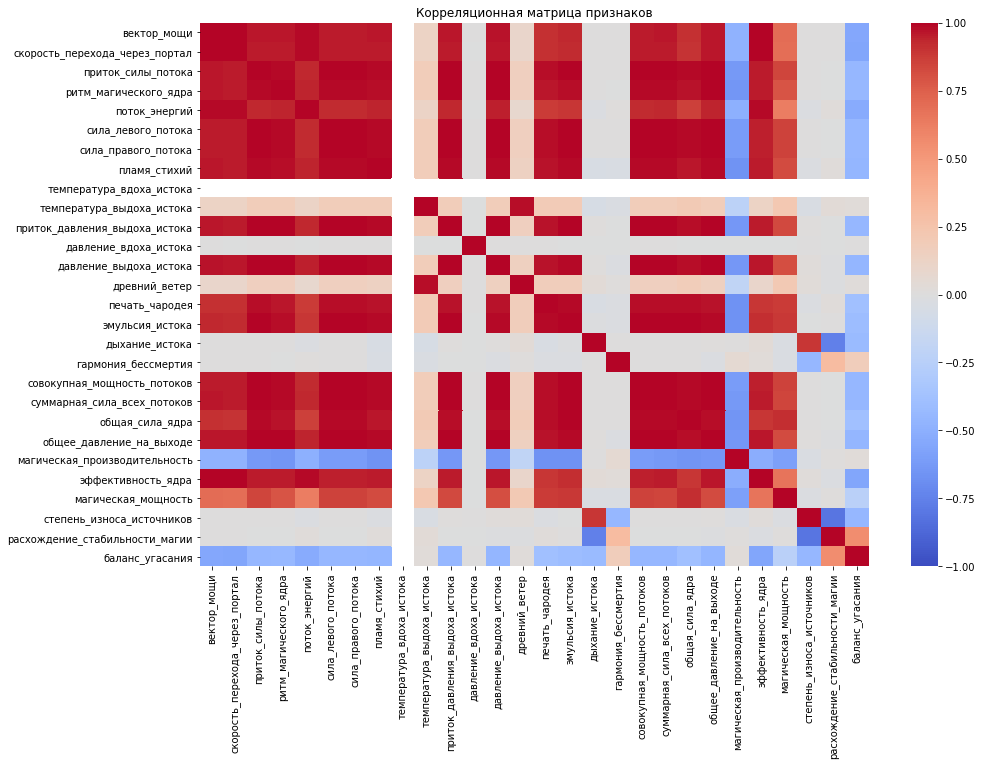

In [23]:
# 3. Корреляционный анализ
plt.figure(figsize=(15, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Корреляционная матрица признаков")
plt.show()


In [24]:
high_corr_features = ['вектор_мощи', 'скорость_перехода_через_портал', 'ритм_магического_ядра', 
                      'поток_энергий', 'сила_левого_потока', 'сила_правого_потока', 'приток_давления_выдоха_истока', 'пламя_стихий',
                     'давление_выдоха_истока', 'магическая_производительность', 'эффективность_ядра', 
                     'степень_износа_источников']

In [25]:
df_drop = df.copy()

In [26]:
df_drop = df_drop.drop(columns=high_corr_features)

<b>Построим корреляционную матрицу признаков</b>

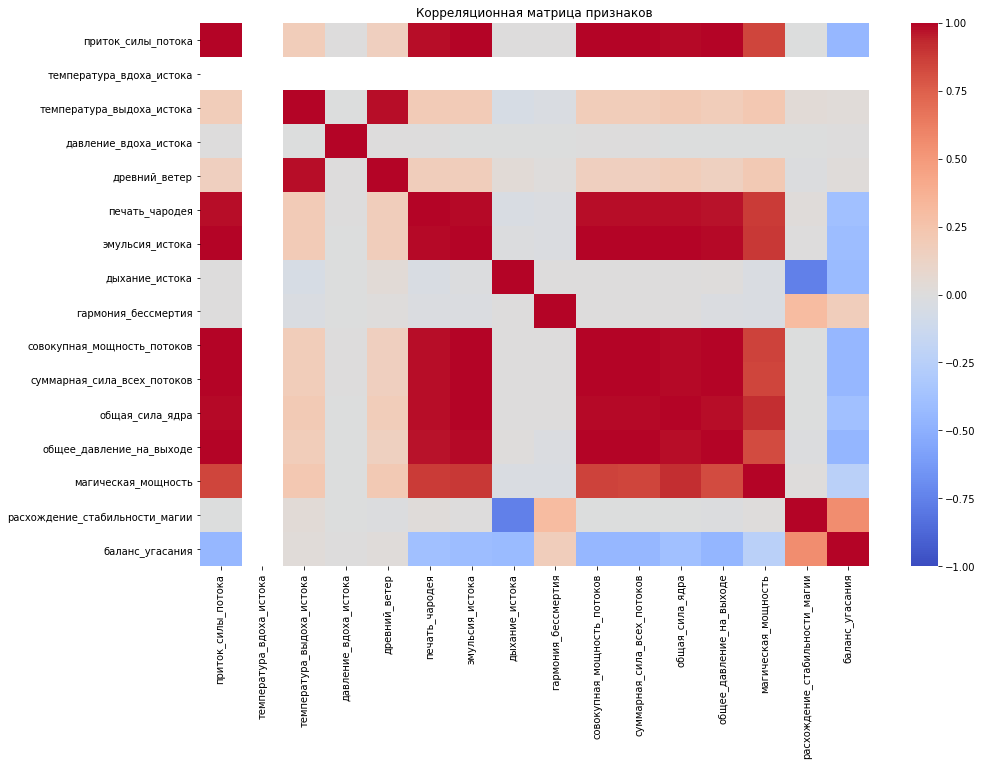

In [27]:
plt.figure(figsize=(15, 10))
correlation_matrix = df_drop.corr()
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Корреляционная матрица признаков")
plt.show()

In [28]:
df_drop.head()

,приток_силы_потока,температура_вдоха_истока,температура_выдоха_истока,давление_вдоха_истока,древний_ветер,печать_чародея,эмульсия_истока,дыхание_истока,гармония_бессмертия,совокупная_мощность_потоков,суммарная_сила_всех_потоков,общая_сила_ядра,общее_давление_на_выходе,магическая_мощность,расхождение_стабильности_магии,баланс_угасания
0,289.964,736.0,637.262,1.394603,1.026,7.137,0.082,0.95,0.975,15.168,305.132,4.097718e+04,7.043,157.083607,0.025,0.016199
1,6960.180,736.0,581.658,1.394603,1.019,10.655,0.287,0.95,0.975,56.408,7016.588,1.003044e+06,8.613,248.673787,0.025,0.008099
2,8379.229,736.0,581.658,1.394603,1.019,13.086,0.259,0.95,0.975,120.716,8499.945,1.216839e+06,8.963,301.779567,0.025,0.005400
3,14724.395,736.0,581.658,1.394603,1.019,18.109,0.358,0.95,0.975,227.548,14951.943,2.386091e+06,10.665,284.556939,0.025,0.004050
4,21636.432,736.0,645.642,1.394603,1.026,26.373,0.522,0.95,0.975,350.612,21987.044,4.360035e+06,13.275,31.224552,0.025,0.003240


In [29]:
 df_drop.гармония_бессмертия

0        0.975
1        0.975
2        0.975
3        0.975
4        0.975
         ...  
11929    1.000
11930    1.000
11931    1.000
11932    1.000
11933    1.000
Name: гармония_бессмертия, Length: 11934, dtype: float64

In [30]:
# Указываем название целевого столбца
target_column = 'гармония_бессмертия'

# Разделяем признаки и целевую переменную
X = df_drop.drop(columns=[target_column])
y = df_drop[target_column]

# Разделяем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
# 5. Обучение моделей линейной регресии, градиентного бустинга, случайного леса
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    results[model_name] = {'MAE': mae, 'RMSE': rmse}

In [32]:
# 6. Выбор модели с наименьшей ошибкой
best_model_name = min(results, key=lambda k: results[k]['RMSE'])
best_model = models[best_model_name]

print(f"Лучшая модель: {best_model_name}")
print(f"MAE: {results[best_model_name]['MAE']}, RMSE: {results[best_model_name]['RMSE']}")

Лучшая модель: Random Forest
MAE: 0.00020697528278168392, RMSE: 0.00046552244166632743


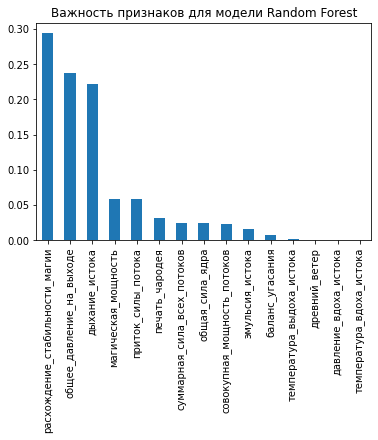

Рекомендации: модель с минимальной RMSE лучше справляется с задачей регрессии, и её можно использовать для прогнозов.


In [33]:
# 7. Анализ значимости признаков
importances = best_model.feature_importances_ if hasattr(best_model, 'feature_importances_') else None
if importances is not None:
    feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)
    feature_importance.plot(kind='bar')
    plt.title(f'Важность признаков для модели {best_model_name}')
    plt.show()
else:
    print("Модель не поддерживает оценку важности признаков")

# Результаты анализа и рекомендации
print("Рекомендации: модель с минимальной RMSE лучше справляется с задачей регрессии, и её можно использовать для прогнозов.")

In [34]:
#Попробуем удалить больше признаков
high_corr_features_new = ['скорость_перехода_через_портал', 'приток_силы_потока', 'ритм_магического_ядра', 'поток_энергий'
                     ,'сила_левого_потока' , 'сила_правого_потока', 'пламя_стихий', 'вектор_мощи', 'давление_выдоха_истока', 
                    'эмульсия_истока', 'приток_давления_выдоха_истока', 
                   'давление_выдоха_истока', 'печать_чародея', 'температура_вдоха_истока', 'совокупная_мощность_потоков',
                          'общая_сила_ядра', 'общее_давление_на_выходе', 'древний_ветер', 'суммарная_сила_всех_потоков']

In [35]:
df_drop_new = df.copy()

In [36]:
df_drop_new = df_drop_new.drop(columns=high_corr_features_new)

<b>Построим корреляционную матрицу признаков с большим удалением признаков</b>

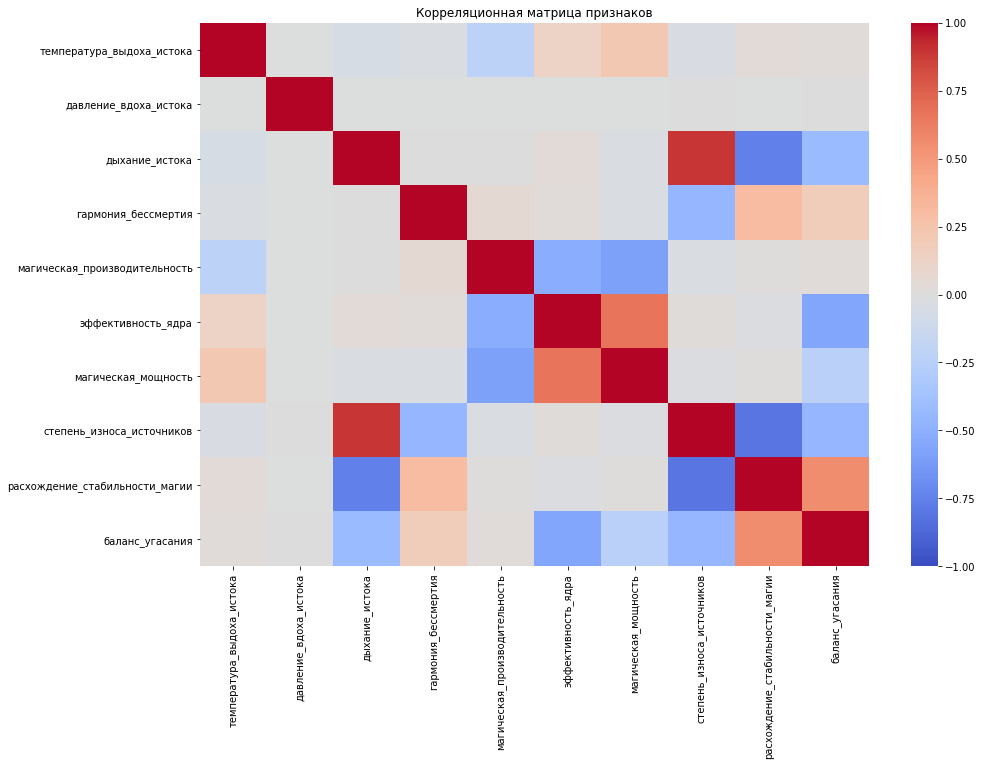

In [37]:
plt.figure(figsize=(15, 10))
correlation_matrix = df_drop_new.corr()
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Корреляционная матрица признаков")
plt.show()

In [38]:
# Указываем название целевого столбца
target_column = 'гармония_бессмертия'

# Разделяем признаки и целевую переменную
X = df_drop_new.drop(columns=[target_column])
y = df_drop_new[target_column]

# Разделяем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    results[model_name] = {'MAE': mae, 'RMSE': rmse}

In [40]:
# 6. Выбор модели с наименьшей ошибкой
best_model_name = min(results, key=lambda k: results[k]['RMSE'])
best_model = models[best_model_name]

print(f"Лучшая модель: {best_model_name}")
print(f"MAE: {results[best_model_name]['MAE']}, RMSE: {results[best_model_name]['RMSE']}")

Лучшая модель: Random Forest
MAE: 5.5261834939286795e-05, RMSE: 8.943592726569253e-05


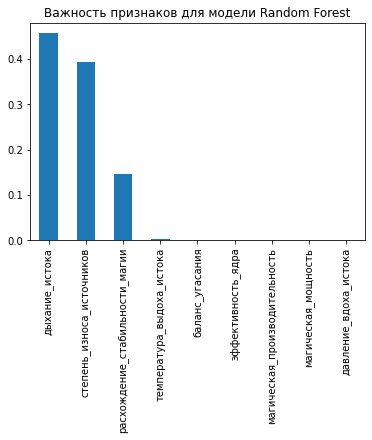

Рекомендации: модель с минимальной RMSE лучше справляется с задачей регрессии, и её можно использовать для прогнозов.


In [41]:
# 7. Анализ значимости признаков
importances = best_model.feature_importances_ if hasattr(best_model, 'feature_importances_') else None
if importances is not None:
    feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)
    feature_importance.plot(kind='bar')
    plt.title(f'Важность признаков для модели {best_model_name}')
    plt.show()
else:
    print("Модель не поддерживает оценку важности признаков")

# Результаты анализа и рекомендации
print("Рекомендации: модель с минимальной RMSE лучше справляется с задачей регрессии, и её можно использовать для прогнозов.")

<b>Второй вариант модели с меньшим количеством признаков лучше, так как и MAE, и RMSE имеют более низкие значения, 
что указывает на более высокую точность модели в предсказании целевой переменной.
Random Forest — предпочтительная модель по сравнению с Linear Regression из-за меньших значений MAE и RMSE, что указывает на более точные и устойчивые предсказания.</b>
